In [1]:
# Import library for visualization
import sys
sys.path.append("../../python")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from os import listdir, path, makedirs
from auditing_setup.election_setting import Election
from collections import defaultdict

In [2]:
base_path = "../../sample_size/"

# We parse the file structure into a dictionary/pandas dataframe
def parse_election_name_to_object(election_string):
    election_params = {}
    for election_pair in election_string.split("_"):
        key, value = election_pair.split("=")
        election_params[key] = eval(value.lstrip("0"))
    return Election(**election_params)
            

def parse_data_dir(data_dir):
    data_dir_df = pd.DataFrame()
    df_dict = defaultdict(pd.DataFrame)
    for election_dir_file in listdir(data_dir):
        election = parse_election_name_to_object(election_dir_file)
        for data_dir_file in listdir(path.join(data_dir, election_dir_file)):
            for data_file in listdir(path.join(data_dir, election_dir_file, data_dir_file)):
                key = data_file.replace(".csv","")
                data_file = path.join(data_dir, election_dir_file, data_dir_file, data_file)
                data = pd.read_csv(data_file, header=0)
                try:
                    for i, row in data.iterrows():
                        row.name = election
                        legend = "_".join(row["legend"].split(" | ")[:-1])
                        df_dict[legend+"_"+key] = df_dict[legend+"_"+key].append(row)
                except:
                    pass
    for df in df_dict.values():
        cols = []
        for i in df.columns:
            try:
                cols.append(float(i))
            except Exception as e:
                cols.append(i)
        df.columns = cols
        df.index.set_names("election", inplace=True)
        df = df.assign(f = [idx.m for idx in df.index]).sort_values('f', ascending=False).drop('f', axis=1)
    return df_dict

In [3]:
df_dict = parse_data_dir(base_path)
cols = []
for i in list(df_dict.values())[0].columns:
    try:
        float(i)
        cols.append(float(i))
    except Exception as e:
        pass
list(df_dict.keys())

['bayesian_a=1_b=1_bayesian_unconditional_quantile0.50',
 'bayesian_a=1_b=1_bayesian_conditionalmean',
 'bayesian_a=1_b=1_bayesian_unconditional_quantile0.90',
 'bayesian_a=1_b=1_bayesian_unconditional_mean',
 'bayesian_a=1_b=1_bayesian_conditional_quantile0.99',
 'bayesian_a=1_b=1_bayesian_conditional_quantile0.75',
 'bayesian_a=1_b=1_bayesian_unconditional_quantile0.25',
 'bayesian_a=1_b=1_bayesian_conditional_quantile0.50',
 'bayesian_a=1_b=1_bayesian_conditional_quantile0.90',
 'bayesian_a=1_b=1_bayesian_power',
 'bayesian_a=1_b=1_bayesian_conditional_quantile0.25',
 'bayesian_a=1_b=1_bayesian_unconditional_quantile0.75',
 'bayesian_a=1_b=1_bayesian_unconditional_mean_with_recount',
 'bayesian_a=1_b=1_bayesian_unconditional_quantile0.99',
 'bravo_without_replacement_p=0.55_bravo_without_replacement_conditional_quantile0.99',
 'bravo_without_replacement_p=0.52_bravo_without_replacement_conditional_quantile0.99',
 'bravo_without_replacement_p=0.55_bravo_without_replacement_unconditio

## Bravo p=0.55

In [21]:
makedirs("../../new_figures/max_sample/bravo_without_replacement_p=0.55")

FileExistsError: [Errno 17] File exists: '../../new_figures/max_sample/bravo_without_replacement_p=0.55'

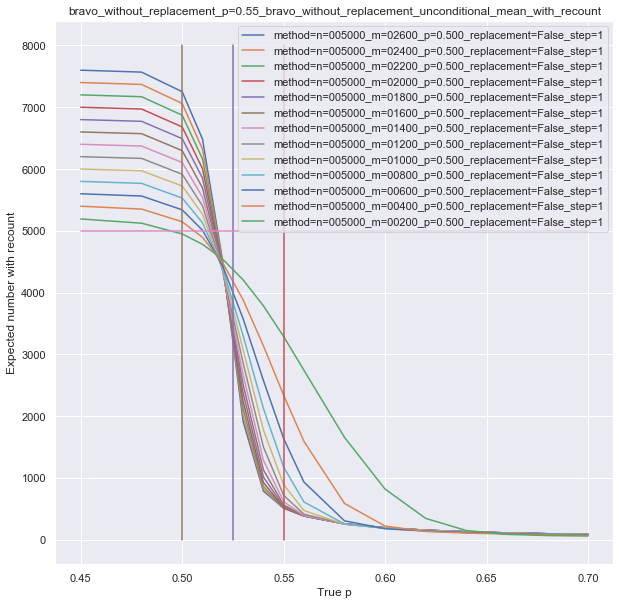

In [22]:
df = df_dict["bravo_without_replacement_p=0.55_bravo_without_replacement_unconditional_mean_with_recount"]
df = df.assign(f = [idx.m for idx in df.index]).sort_values('f', ascending=False).drop('f', axis=1)
plt.figure(figsize=[10,10])
plt.plot(cols, df[cols].transpose())
plt.plot([0.55, 0.55],[0, 8000])
plt.plot([0.525, 0.525],[0, 8000])
plt.plot([0.5, 0.5],[0, 8000])
plt.plot([0.45, 0.7],[5000, 5000])
plt.legend([f"method={i}" for i in df.index])
plt.title("bravo_without_replacement_p=0.55_bravo_without_replacement_unconditional_mean_with_recount")
plt.ylabel("Expected number with recount")
plt.xlabel("True p")
plt.savefig("../../new_figures/max_sample/bravo_without_replacement_p=0.55/unconditional_mean_with_recount.png")

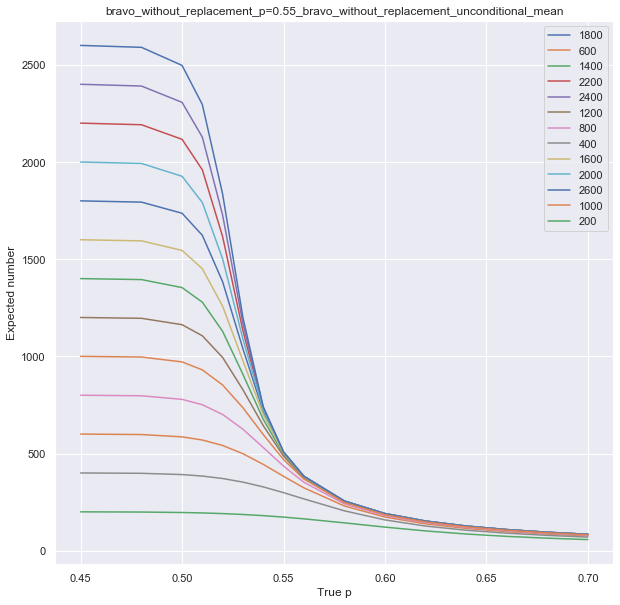

In [43]:
df = df_dict["bravo_without_replacement_p=0.55_bravo_without_replacement_unconditional_mean"]
plt.figure(figsize=[10,10])
plt.plot(cols, df[cols].transpose())
plt.legend([i.m for i in df.index])
plt.title("bravo_without_replacement_p=0.55_bravo_without_replacement_unconditional_mean")
plt.ylabel("Expected number")
plt.xlabel("True p")
plt.savefig("../../new_figures/max_sample/bravo_without_replacement_p=0.55/unconditional_mean.png")

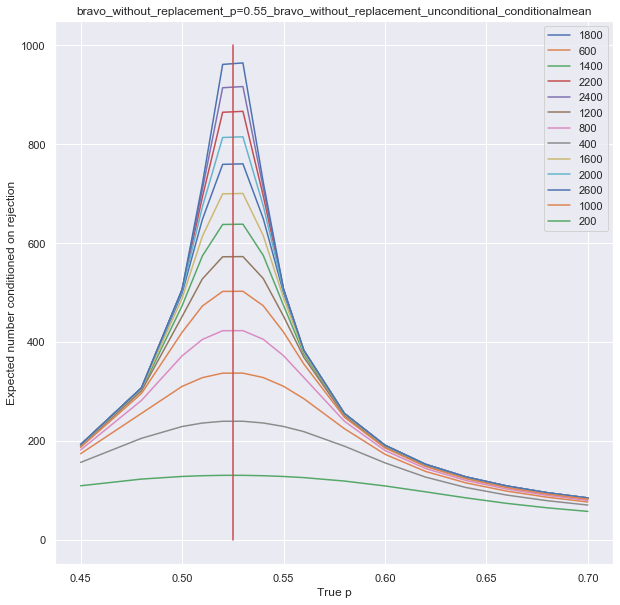

In [44]:
df = df_dict["bravo_without_replacement_p=0.55_bravo_without_replacement_conditionalmean"]
plt.figure(figsize=[10,10])
plt.plot(cols, df[cols].transpose())
plt.plot([0.525, 0.525],[0, 1000])
plt.legend([i.m for i in df.index])
plt.title("bravo_without_replacement_p=0.55_bravo_without_replacement_unconditional_conditionalmean")
plt.ylabel("Expected number conditioned on rejection")
plt.xlabel("True p")
plt.savefig("../../new_figures/max_sample/bravo_without_replacement_p=0.55/conditional_mean.png")

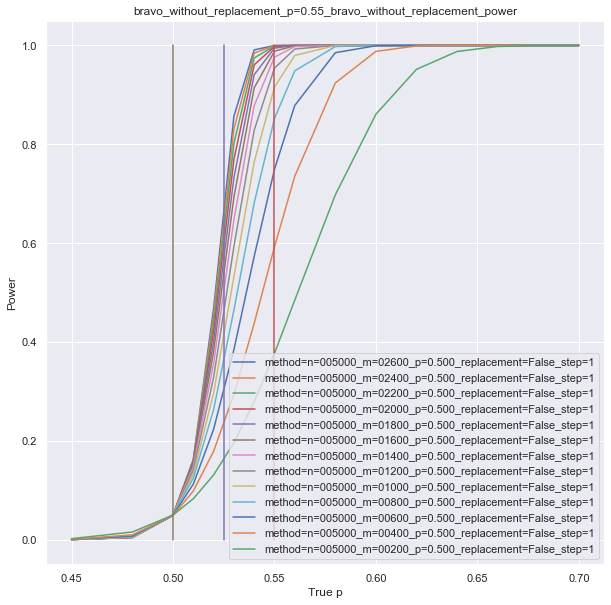

In [45]:
df = df_dict["bravo_without_replacement_p=0.55_bravo_without_replacement_power"]
df = df.assign(f = [idx.m for idx in df.index]).sort_values('f', ascending=False).drop('f', axis=1)
plt.figure(figsize=[10,10])
plt.plot(cols, df[cols].transpose())
plt.plot([0.55, 0.55],[0, 1])
plt.plot([0.525, 0.525],[0, 1])
plt.plot([0.5, 0.5],[0, 1])
plt.legend([f"method={i}" for i in df.index])
plt.title("bravo_without_replacement_p=0.55_bravo_without_replacement_power")
plt.ylabel("Power")
plt.xlabel("True p")
plt.savefig("../../new_figures/max_sample/bravo_without_replacement_p=0.55/power.png")

Text(0.5, 0, 'True p')

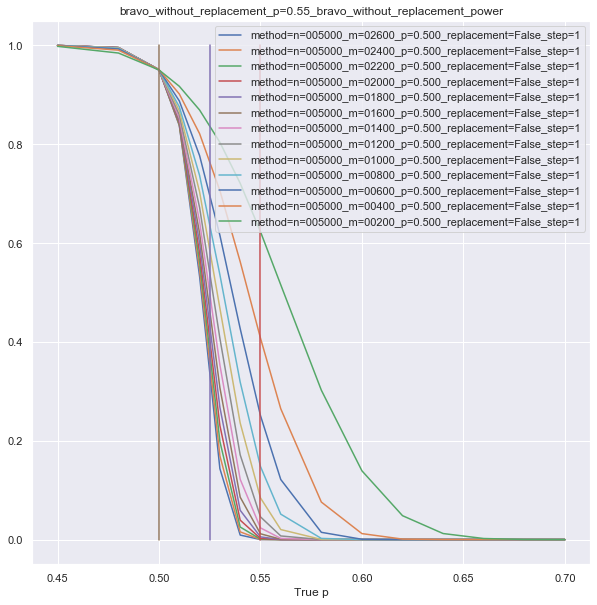

In [46]:
df = df_dict["bravo_without_replacement_p=0.55_bravo_without_replacement_power"]
df = df.assign(f = [idx.m for idx in df.index]).sort_values('f', ascending=False).drop('f', axis=1)
plt.figure(figsize=[10,10])
plt.plot(cols, 1-df[cols].transpose())
plt.plot([0.55, 0.55],[0, 1])
plt.plot([0.525, 0.525],[0, 1])
plt.plot([0.5, 0.5],[0, 1])
plt.legend([f"method={i}" for i in df.index])
plt.title("bravo_without_replacement_p=0.55_bravo_without_replacement_power")
plt.xlabel("1 - power")
plt.xlabel("True p")

## Bravo p = 0.52

In [27]:
makedirs("../../new_figures/max_sample/bravo_without_replacement_p=0.52")

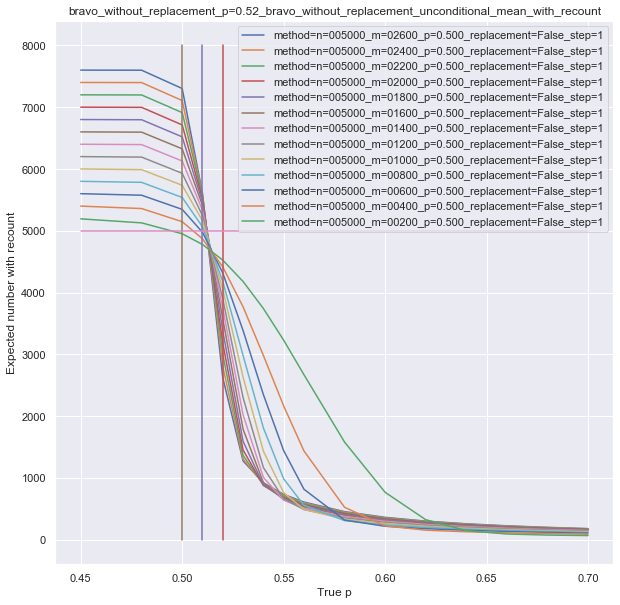

In [48]:
df = df_dict["bravo_without_replacement_p=0.52_bravo_without_replacement_unconditional_mean_with_recount"]
df = df.assign(f = [idx.m for idx in df.index]).sort_values('f', ascending=False).drop('f', axis=1)
plt.figure(figsize=[10,10])
plt.plot(cols, df[cols].transpose())
plt.plot([0.52, 0.52],[0, 8000])
plt.plot([0.51, 0.51],[0, 8000])
plt.plot([0.5, 0.5],[0, 8000])
plt.plot([0.45, 0.7],[5000, 5000])
plt.legend([f"method={i}" for i in df.index])
plt.title("bravo_without_replacement_p=0.52_bravo_without_replacement_unconditional_mean_with_recount")
plt.ylabel("Expected number with recount")
plt.xlabel("True p")
plt.savefig("../../new_figures/max_sample/bravo_without_replacement_p=0.52/unconditional_mean_with_recount.png")

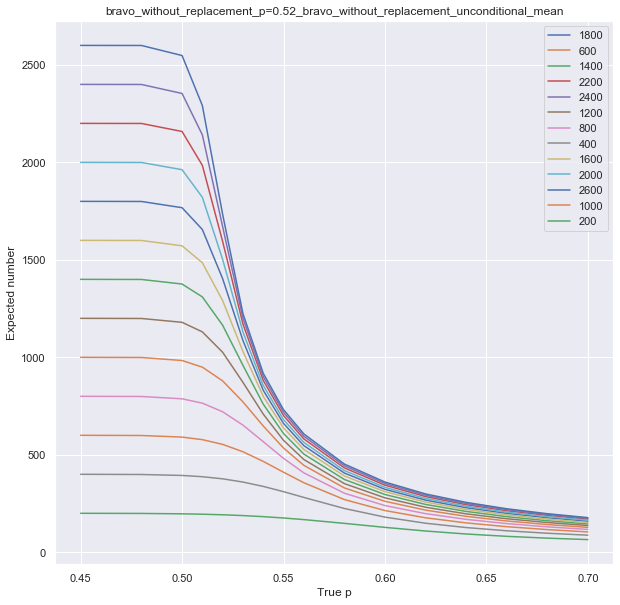

In [49]:
df = df_dict["bravo_without_replacement_p=0.52_bravo_without_replacement_unconditional_mean"]
plt.figure(figsize=[10,10])
plt.plot(cols, df[cols].transpose())
plt.legend([i.m for i in df.index])
plt.title("bravo_without_replacement_p=0.52_bravo_without_replacement_unconditional_mean")
plt.ylabel("Expected number")
plt.xlabel("True p")
plt.savefig("../../new_figures/max_sample/bravo_without_replacement_p=0.52/unconditional_mean.png")

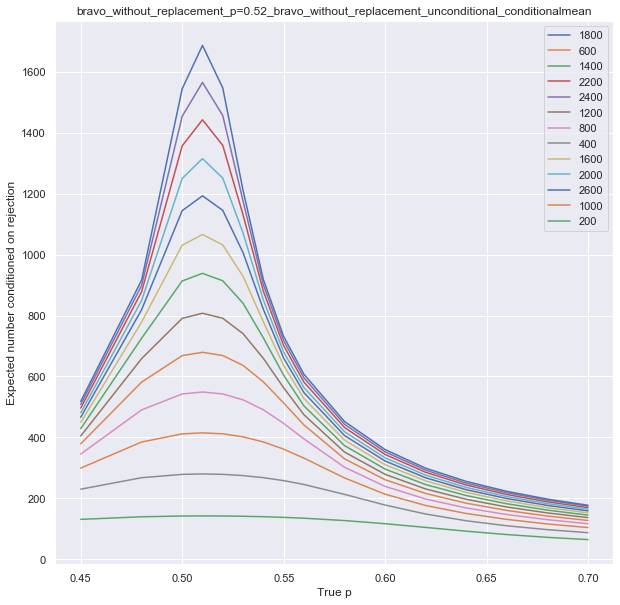

In [50]:
df = df_dict["bravo_without_replacement_p=0.52_bravo_without_replacement_conditionalmean"]
plt.figure(figsize=[10,10])
plt.plot(cols, df[cols].transpose())
plt.legend([i.m for i in df.index])
plt.title("bravo_without_replacement_p=0.52_bravo_without_replacement_unconditional_conditionalmean")
plt.ylabel("Expected number conditioned on rejection")
plt.xlabel("True p")
plt.savefig("../../new_figures/max_sample/bravo_without_replacement_p=0.52/conditional_mean.png")

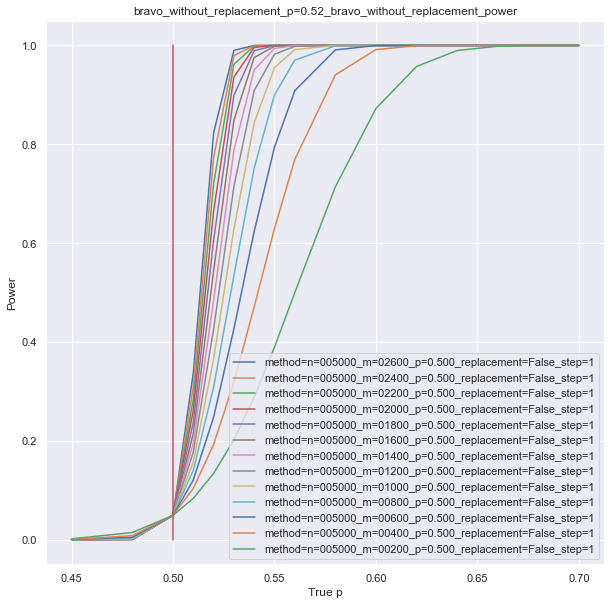

In [54]:
df = df_dict["bravo_without_replacement_p=0.52_bravo_without_replacement_power"]
df = df.assign(f = [idx.m for idx in df.index]).sort_values('f', ascending=False).drop('f', axis=1)
plt.figure(figsize=[10,10])
plt.plot(cols, df[cols].transpose())
plt.legend([f"method={i}" for i in df.index])
plt.plot([0.5, 0.5],[0, 1])
plt.title("bravo_without_replacement_p=0.52_bravo_without_replacement_power")
plt.ylabel("Power")
plt.xlabel("True p")
plt.savefig("../../new_figures/max_sample/bravo_without_replacement_p=0.52/power.png")

Text(0.5, 0, 'True p')

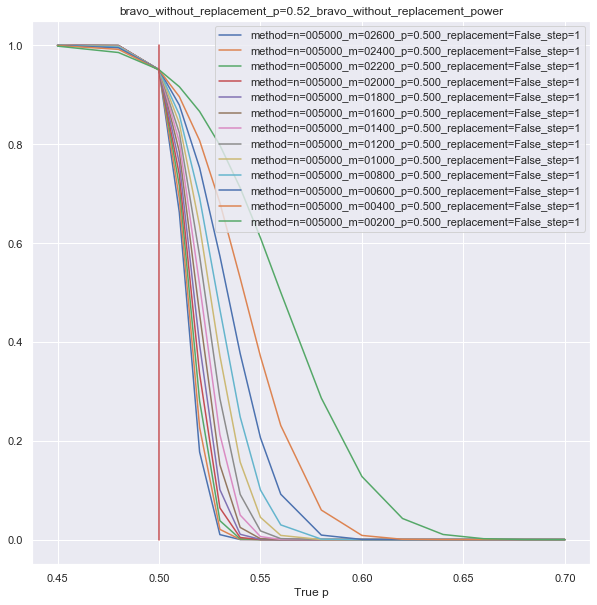

In [55]:
df = df_dict["bravo_without_replacement_p=0.52_bravo_without_replacement_power"]
df = df.assign(f = [idx.m for idx in df.index]).sort_values('f', ascending=False).drop('f', axis=1)
plt.figure(figsize=[10,10])
plt.plot(cols, 1-df[cols].transpose())
plt.plot([0.5, 0.5],[0, 1])
plt.legend([f"method={i}" for i in df.index])
plt.title("bravo_without_replacement_p=0.52_bravo_without_replacement_power")
plt.xlabel("1 - power")
plt.xlabel("True p")

## Bayesian

In [56]:
makedirs("../../new_figures/max_sample/bayesian_a=1_b=1")

FileExistsError: [Errno 17] File exists: '../../new_figures/max_sample/bayesian_a=1_b=1'

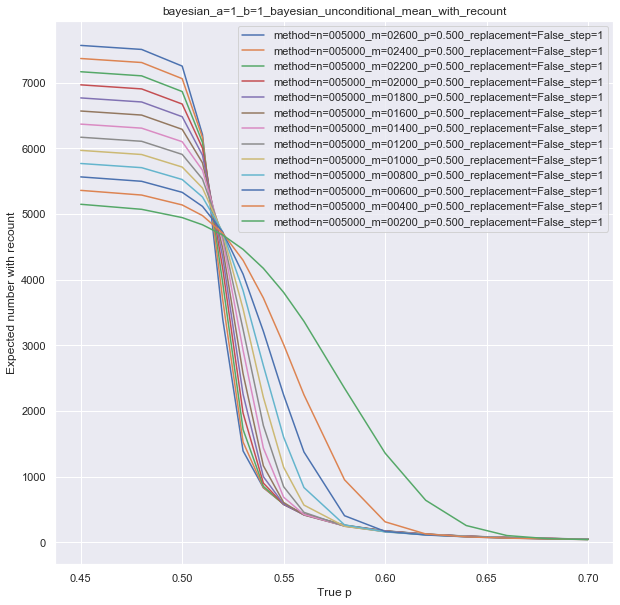

In [57]:
df = df_dict["bayesian_a=1_b=1_bayesian_unconditional_mean_with_recount"]
df = df.assign(f = [idx.m for idx in df.index]).sort_values('f', ascending=False).drop('f', axis=1)
plt.figure(figsize=[10,10])
plt.plot(cols, df[cols].transpose())
plt.legend([f"method={i}" for i in df.index])
plt.title("bayesian_a=1_b=1_bayesian_unconditional_mean_with_recount")
plt.ylabel("Expected number with recount")
plt.xlabel("True p")
plt.savefig("../../new_figures/max_sample/bayesian_a=1_b=1/unconditional_mean_with_recount.png")

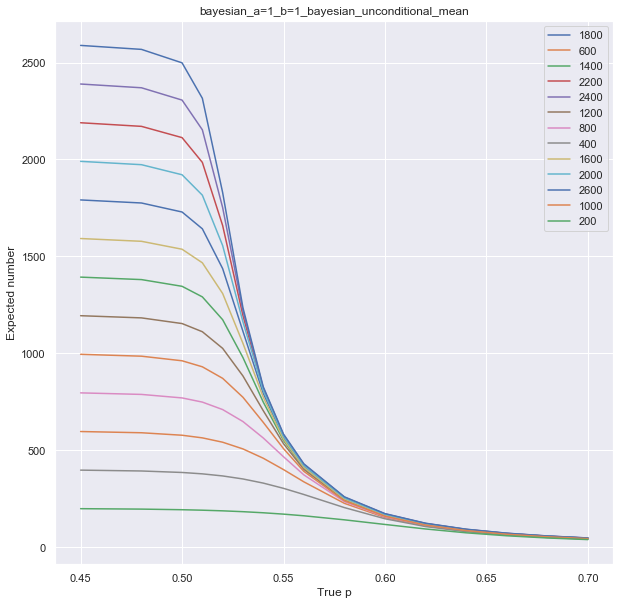

In [59]:
df = df_dict["bayesian_a=1_b=1_bayesian_unconditional_mean"]
plt.figure(figsize=[10,10])
plt.plot(cols, df[cols].transpose())
plt.legend([i.m for i in df.index])
plt.title("bayesian_a=1_b=1_bayesian_unconditional_mean")
plt.ylabel("Expected number")
plt.xlabel("True p")
plt.savefig("../../new_figures/max_sample/bayesian_a=1_b=1/unconditional_mean.png")

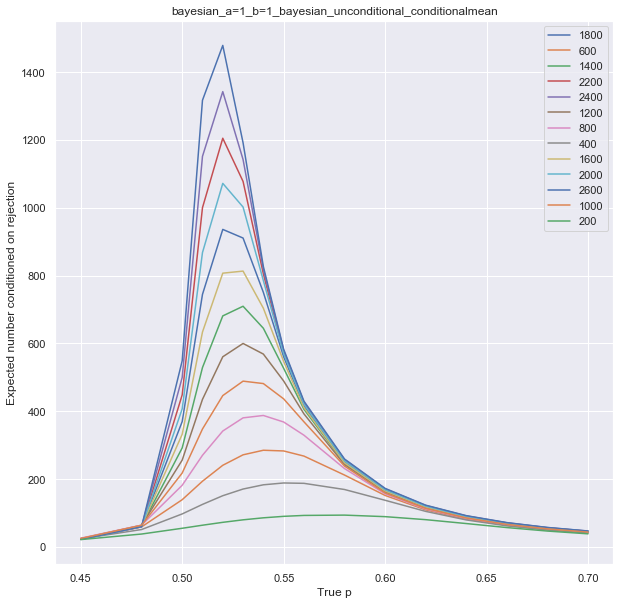

In [60]:
df = df_dict["bayesian_a=1_b=1_bayesian_conditionalmean"]
plt.figure(figsize=[10,10])
plt.plot(cols, df[cols].transpose())
plt.legend([i.m for i in df.index])
plt.title("bayesian_a=1_b=1_bayesian_unconditional_conditionalmean")
plt.ylabel("Expected number conditioned on rejection")
plt.xlabel("True p")
plt.savefig("../../new_figures/max_sample/bayesian_a=1_b=1/conditional_mean.png")

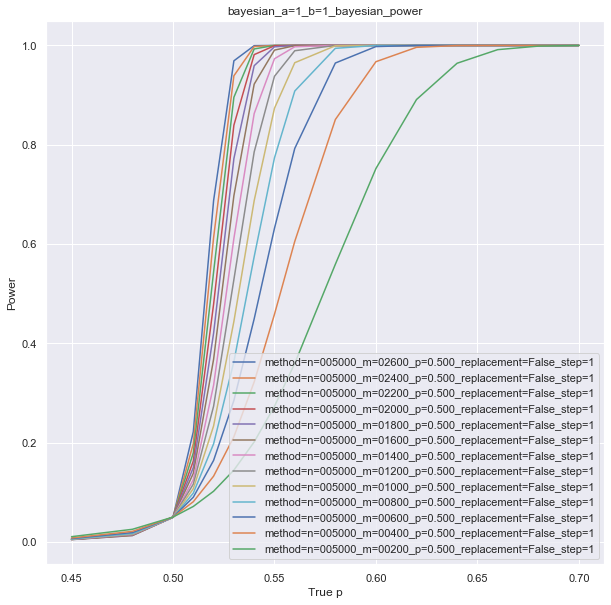

In [61]:
df = df_dict["bayesian_a=1_b=1_bayesian_power"]
df = df.assign(f = [idx.m for idx in df.index]).sort_values('f', ascending=False).drop('f', axis=1)
plt.figure(figsize=[10,10])
plt.plot(cols, df[cols].transpose())
plt.legend([f"method={i}" for i in df.index])
plt.title("bayesian_a=1_b=1_bayesian_power")
plt.ylabel("Power")
plt.xlabel("True p")
plt.savefig("../../new_figures/max_sample/bayesian_a=1_b=1/power.png")

Text(0.5, 0, 'True p')

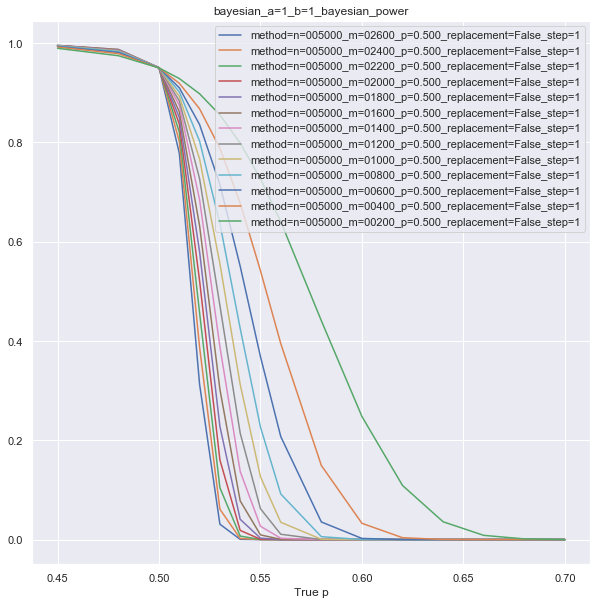

In [62]:
df = df_dict["bayesian_a=1_b=1_bayesian_power"]
df = df.assign(f = [idx.m for idx in df.index]).sort_values('f', ascending=False).drop('f', axis=1)
plt.figure(figsize=[10,10])
plt.plot(cols, 1-df[cols].transpose())
plt.legend([f"method={i}" for i in df.index])
plt.title("bayesian_a=1_b=1_bayesian_power")
plt.xlabel("1 - power")
plt.xlabel("True p")

# Plot for report

KeyError: "['legend'] not found in axis"

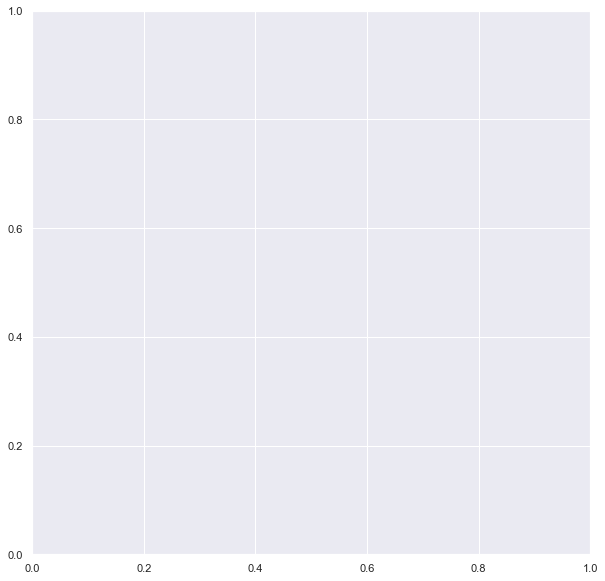

In [9]:
import seaborn as sns
sns.set()

df = df_dict["bravo_without_replacement_p=0.55_bravo_without_replacement_unconditional_mean_with_recount"]

df = df.assign(f = [idx.m for idx in df.index]).sort_values('f', ascending=False).drop('f', axis=1)
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
sns.lineplot(data=df.drop("legend").transpose(), ax=ax)
plt.plot([0.55, 0.55],[0, 8000])
plt.plot([0.525, 0.525],[0, 8000])
plt.plot([0.5, 0.5],[0, 8000])
plt.plot([0.45, 0.7],[5000, 5000])
plt.legend([f"method={i}" for i in df.index])
plt.title("bravo_without_replacement_p=0.55_bravo_without_replacement_unconditional_mean_with_recount")
plt.xlabel("Expected number")
plt.xlabel("True p")